In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rfcx-species-audio-detection/sample_submission.csv
/kaggle/input/rfcx-species-audio-detection/train_fp.csv
/kaggle/input/rfcx-species-audio-detection/train_tp.csv
/kaggle/input/rfcx-species-audio-detection/tfrecords/test/18-63.tfrec
/kaggle/input/rfcx-species-audio-detection/tfrecords/test/08-63.tfrec
/kaggle/input/rfcx-species-audio-detection/tfrecords/test/13-63.tfrec
/kaggle/input/rfcx-species-audio-detection/tfrecords/test/11-63.tfrec
/kaggle/input/rfcx-species-audio-detection/tfrecords/test/02-63.tfrec
/kaggle/input/rfcx-species-audio-detection/tfrecords/test/07-63.tfrec
/kaggle/input/rfcx-species-audio-detection/tfrecords/test/27-63.tfrec
/kaggle/input/rfcx-species-audio-detection/tfrecords/test/23-63.tfrec
/kaggle/input/rfcx-species-audio-detection/tfrecords/test/04-63.tfrec
/kaggle/input/rfcx-species-audio-detection/tfrecords/test/30-63.tfrec
/kaggle/input/rfcx-species-audio-detection/tfrecords/test/01-63.tfrec
/kaggle/input/rfcx-species-audio-detection/tfrecords/

In [2]:
import seaborn as sns

In [3]:
train_fp = "/kaggle/input/rfcx-species-audio-detection/train_fp.csv"
df0 = pd.read_csv(train_fp)
df0.head()

,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max
0,00204008d,21,1,13.8400,3281.2500,14.9333,4125.0000
1,00204008d,8,1,24.4960,3750.0000,28.6187,5531.2500
2,00204008d,4,1,15.0027,2343.7500,16.8587,4218.7500
3,003b04435,22,1,43.2533,10687.5000,44.8587,13687.5000
4,003b04435,23,1,9.1254,7235.1562,15.2091,11283.3984


In [4]:
train_tp = "/kaggle/input/rfcx-species-audio-detection/train_tp.csv"
df1 = pd.read_csv(train_tp)
df1.head()

,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max
0,003bec244,14,1,44.5440,2531.250,45.1307,5531.25
1,006ab765f,23,1,39.9615,7235.160,46.0452,11283.40
2,007f87ba2,12,1,39.1360,562.500,42.2720,3281.25
3,0099c367b,17,4,51.4206,1464.260,55.1996,4565.04
4,009b760e6,10,1,50.0854,947.461,52.5293,10852.70


In [5]:
df0.corr()

,species_id,songtype_id,t_min,f_min,t_max,f_max
species_id,1.000000,0.334008,-0.025628,0.247038,0.017018,0.195182
songtype_id,0.334008,1.000000,-0.014842,0.114167,0.015309,0.192389
t_min,-0.025628,-0.014842,1.000000,-0.035333,0.994578,-0.020712
f_min,0.247038,0.114167,-0.035333,1.000000,-0.015544,0.795793
t_max,0.017018,0.015309,0.994578,-0.015544,1.000000,0.009304
f_max,0.195182,0.192389,-0.020712,0.795793,0.009304,1.000000


In [6]:
df1.corr()

,species_id,songtype_id,t_min,f_min,t_max,f_max
species_id,1.000000,0.334821,0.029143,0.246400,0.075323,0.161420
songtype_id,0.334821,1.000000,-0.027190,0.153581,0.009831,0.127378
t_min,0.029143,-0.027190,1.000000,-0.041304,0.994105,-0.035512
f_min,0.246400,0.153581,-0.041304,1.000000,-0.017287,0.805320
t_max,0.075323,0.009831,0.994105,-0.017287,1.000000,0.003269
f_max,0.161420,0.127378,-0.035512,0.805320,0.003269,1.000000


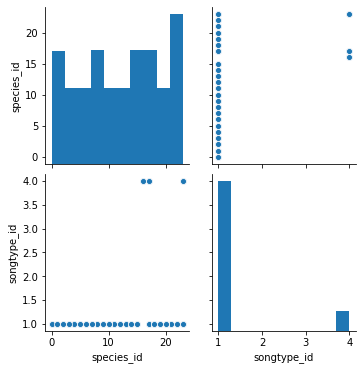

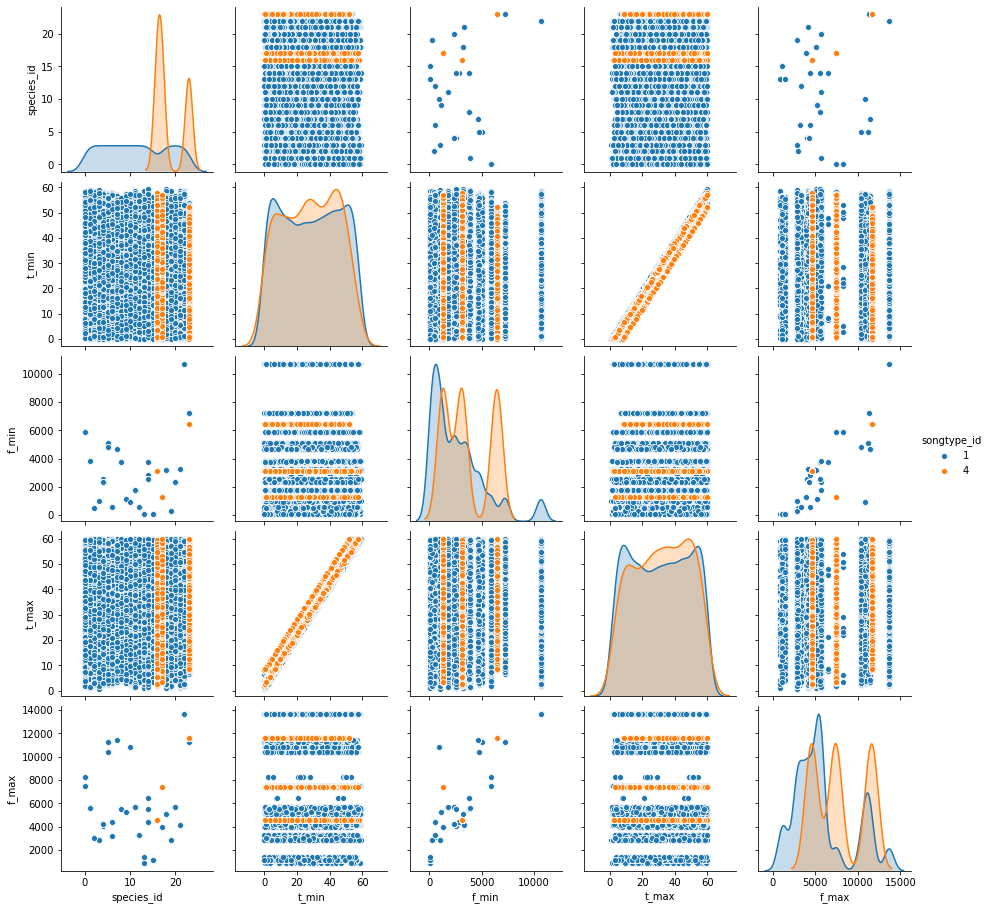

In [7]:
sns.pairplot(df0,vars=["species_id","songtype_id"])  
sns.pairplot(df0 , hue ='songtype_id'); 

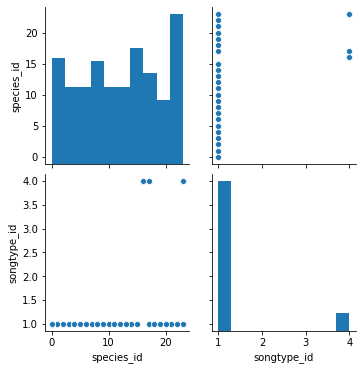

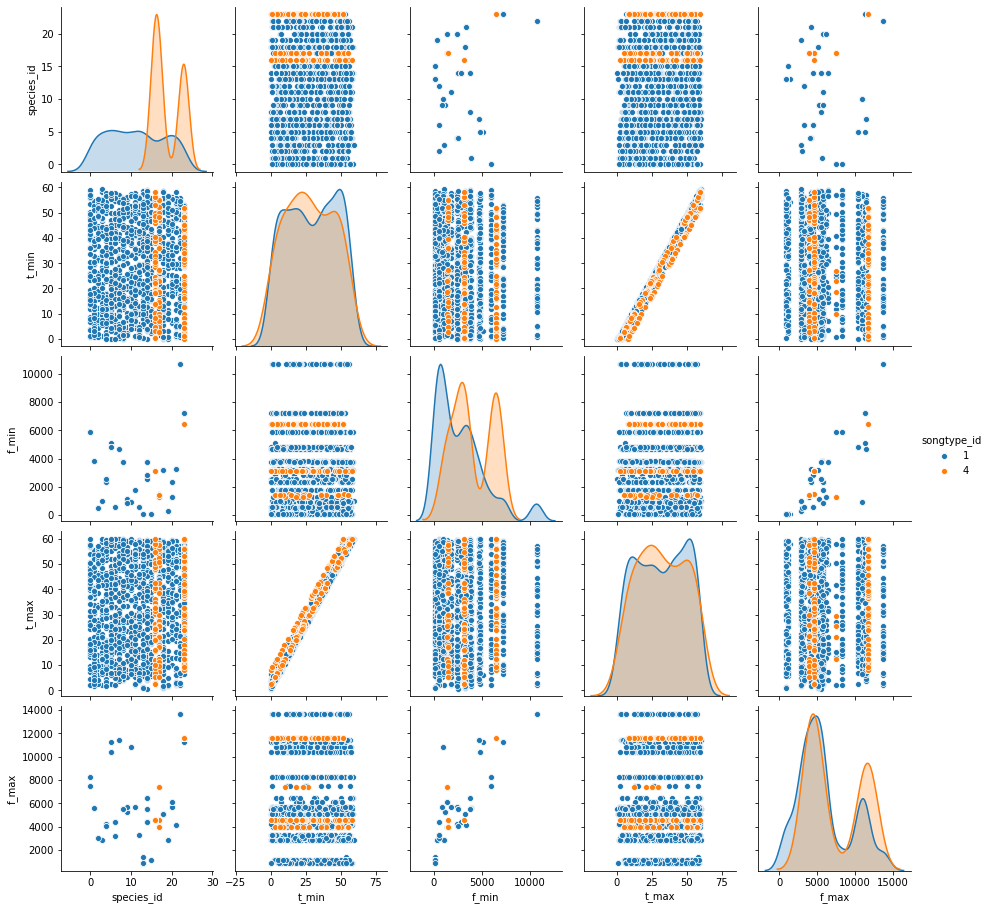

In [8]:
sns.pairplot(df1,vars=["species_id","songtype_id"])  
sns.pairplot(df1 , hue ='songtype_id'); 

In [9]:
df0[df0["songtype_id"]==4]

,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max
20,009fbc7b4,16,4,5.0293,3093.7500,6.8640,4593.7500
35,0178fe09a,16,4,33.3333,3093.7500,35.1680,4593.7500
36,0178fe09a,23,4,6.3042,6459.9609,14.2280,11627.9297
39,01a976045,16,4,14.8800,3093.7500,16.7147,4593.7500
40,01a976045,16,4,8.8480,3093.7500,10.6827,4593.7500
...,...,...,...,...,...,...,...
7770,ffc51b999,16,4,52.9547,3093.7500,54.7893,4593.7500
7771,ffc6031f8,23,4,31.6604,6459.9609,39.5842,11627.9297
7772,ffc6031f8,17,4,27.7333,1312.5000,30.2667,7406.2500
7775,ffd88cd84,17,4,49.1253,1312.5000,51.6587,7406.2500


In [10]:
df1=df1.append(df0)

In [11]:
df1.describe()

,species_id,songtype_id,t_min,f_min,t_max,f_max
count,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000,8997.000000
mean,12.123152,1.342781,28.730672,2838.689153,31.356838,6070.549679
std,7.072935,0.954435,17.466260,2517.374859,17.505154,3397.164641
min,0.000000,1.000000,0.010700,93.750000,0.666700,843.750000
25%,6.000000,1.000000,13.077300,947.460900,15.840000,3937.500000
50%,12.000000,1.000000,28.960000,2343.750000,31.557300,5250.000000
75%,18.000000,1.000000,44.218700,3843.750000,46.949300,7500.000000
max,23.000000,4.000000,59.301300,10687.500000,59.994700,13687.500000


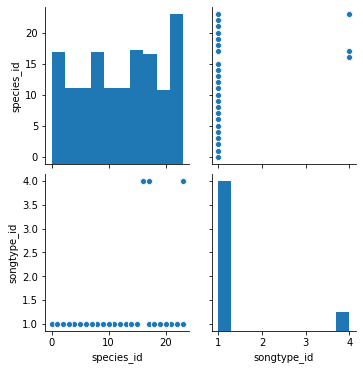

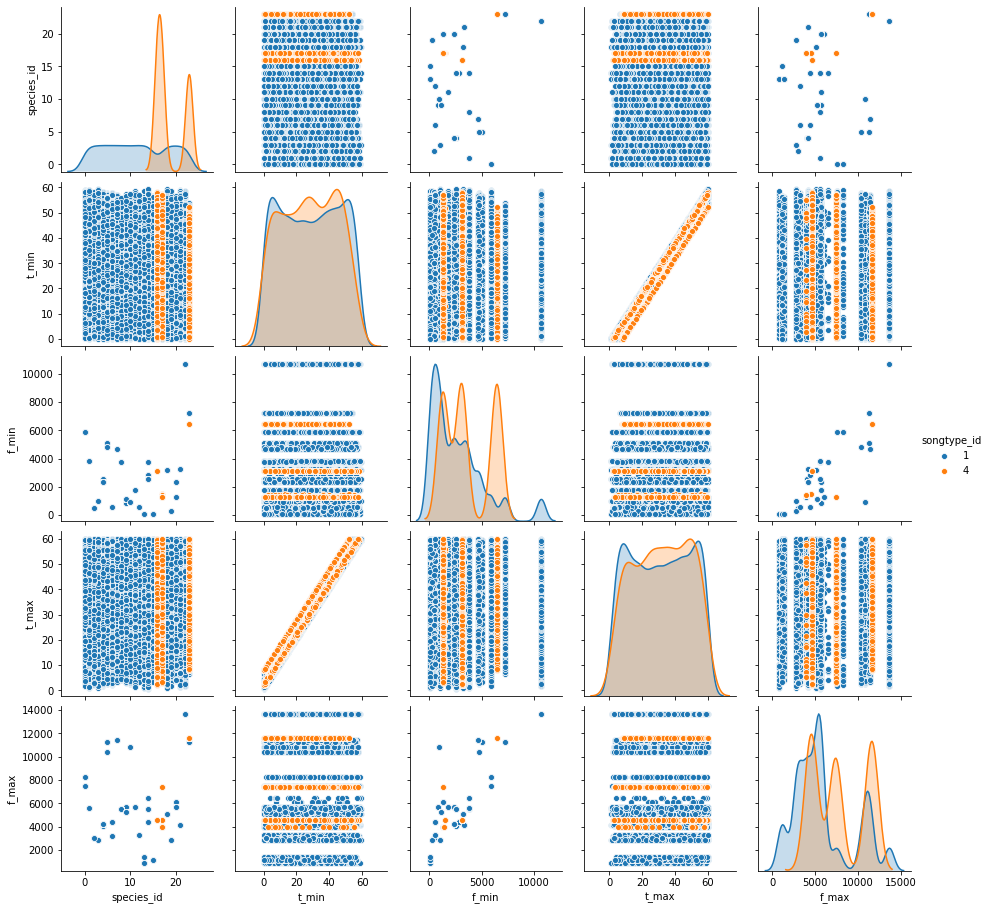

In [12]:
sns.pairplot(df1,vars=["species_id","songtype_id"])  
sns.pairplot(df1 , hue ='songtype_id'); 

In [13]:
#songtype_id==4，species_id
sp=df1[df1["songtype_id"]==4].drop_duplicates(["species_id"])
print(sp)

   recording_id  species_id  songtype_id    t_min    f_min    t_max     f_max
3     0099c367b          17            4  51.4206  1464.26  55.1996   4565.04
18    0313e82cf          16            4  21.4720  3093.75  23.3067   4593.75
28    053aeb7bd          23            4   9.8569  6459.96  17.7807  11627.90
